In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten
import numpy as np
import cv2 
import os
import shutil
import random
import matplotlib.pyplot as plt

In [2]:
#paths


dataset = "/home/ibrahim/Projects/Datasets/Fellowship"
train = dataset + "/Train/"
test = dataset + "/Test/"

os.chdir(dataset)

In [3]:
# For Dataset Prep (just in case I need it later)

# os.chdir(train + "/Normal")
# image_names = os.listdir()
# image_names = random.sample(image_names, len(image_names))
# for i in range(200):
#     shutil.copy(train + "/Normal/" + image_names[i], train+"/Inverted/" + image_names[i])
#     os.remove(train + "/Normal/" + image_names[i])


# Flip Each Image in a given dir

# os.chdir(train + "/Inverted/")
# image_names = os.listdir()

# cv2.namedWindow('show')
# for i in range(len(image_names)):
#     img = cv2.imread(image_names[i])
#     img = cv2.flip(img, 0)
#     cv2.imwrite(os.getcwd() + "/ActuallyInverted/" + image_names[i], img)
#     cv2.imshow('show',img)
#     cv2.waitKey(0)

# cv2.destroyAllWindows()

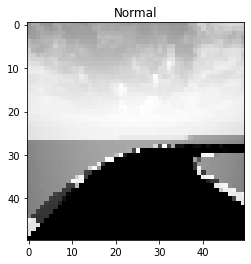

In [4]:
# About the Dataset:

### the following shows a sample from the dataset. The samples contain both the filpped images and the normal images. These images have been extracted from a custom dataset used for the project of end-end self steering vehicle. The images were extracted from airsim

os.chdir(train + '/Normal/')
sample_img = cv2.imread(os.listdir()[1], 0)
sample_img = cv2.resize(sample_img, (50,50))

plt.title('Normal')
plt.imshow(sample_img, cmap="gray")


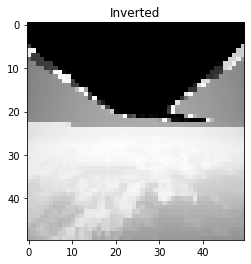

In [5]:
os.chdir(train + '/Inverted/')
sample_img = cv2.imread(os.listdir()[1], 0)
sample_img = cv2.resize(sample_img, (50,50))

plt.title('Inverted')
plt.imshow(sample_img, cmap="gray")

In [6]:
# Creating a Dataset. For simplicity dataloaders and other stuff is not used

categories = ['Normal', 'Inverted']

os.chdir(train)

In [7]:
training_data = []
for i in range(len(categories)):
    # cv2.namedWindow(categories[i])
    os.chdir(train + categories[i] + '/')
    print(i)
    for j in os.listdir():
        img = cv2.imread(j, 0)
        img = cv2.resize(img, (100,100))
        training_data.append([img, i])
    #     cv2.imshow(categories[i], img)
    #     cv2.waitKey(1)
    # cv2.destroyAllWindows()
        

0
1


In [8]:
X = []
Y = []

random.shuffle(training_data)
for x, y in training_data:
    X.append(x)
    Y.append(y)

X = np.array(X).reshape(-1, 100, 100, 1)
Y = np.array(Y)
X = X/255.0
X.shape

(380, 100, 100, 1)

In [9]:
# Defining the Model....Nothing too much fancy here

model = Sequential([
    Conv2D((4), (5,5), input_shape = (100,100,1), activation = 'relu'),
    MaxPool2D(pool_size = (2,2)),
    Flatten(),
    Dense(50, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])


model.summary()
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 4)         104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                460850    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 461,005
Trainable params: 461,005
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X,Y, batch_size = 20, epochs= 1, validation_split = 0.2)

16/16 [==============================] - 1s 89ms/step - loss: 0.0439 - accuracy: 0.9868 - val_loss: 3.0366e-09 - val_accuracy: 1.0000


In [11]:
tf.keras.backend.clear_session()

In [12]:
os.chdir(test)
test_images = sorted(os.listdir())

In [13]:
pred_X = []
pred_Y = []
for i in range(len(test_images)):

    img = cv2.imread(test_images[i], 0)
    img = cv2.resize(img, (100,100))
    pred_X.append(img)
    img = img/255.0
    img = np.array(img).reshape(-1,100,100,1)

    res = np.round(model.predict(img))
    pred_Y.append(res)


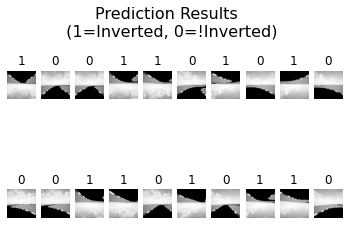

In [14]:
fig = plt.figure()
for i in range(20):
  ax = plt.subplot(2, 10, i + 1)
  plt.imshow(pred_X[i], cmap = "gray")
  plt.title(int(pred_Y[i]))
  fig.suptitle("Prediction Results \n (1=Inverted, 0=!Inverted)", fontsize=16)
  plt.axis("off")
